#   What Are The Common Characteristics of NYC Public Schools with high Educational Quality?

Qiteng Feng, 1004739884

## Introduction



It is a common stereotype in the United States that private schools generally have better teaching quality than public schools. In the book, 'All else equal: are public and private schools different?' (Benveniste, Carnoy, Rothstein, 2003), authors stated public schools became representative of pejorative labels such as large class sizes, unqualified teachers, antiquated curriculum, and lack of parental involvement.

However, not all public high schools are as stereotypical as they should be. Some public high schools in New York City also have outstanding performances, such as Stuyvesant High School, Staten Island Technical High School, and Bronx High School of Science, according to U.S. News ranking(2023). This study aims to find the common features of NYC's top public high schools and attempt to make recommendations to the government for improving the quality of education in other public high schools through the result. The dataset comes from NYC Open Data Website with 435 observations and 22 columns. 

The study found that Manhattan's top schools performed better comparing other boroughs', the percentage of Asian students positively related to school quality, and that top schools usually had high tested student rates.

## Data Loading/Cleaning

### Setting up the project

In this study, the dependent variable is the average total SAT score, combined math, reading, and writing scores. The independent variables are the borough of school location, the percentage of tested students, and the shares of minorities (Black, Hispanic, and Asian). The school's educational quality is measured by its average total SAT score. 

Additionally, location, percentage of tested students, and the shares of minorities are assumed related to the educational quality. The quality of education in public schools and local government spending on education are closely linked, so the area where the school is located is correlated with the school's average SAT score. Students who take the SAT exam might have a stronger desire to attend college, so they will be more willing to study hard. A higher percentage of students participating in the SAT exam indicates a better learning environment in this school and positively influences the average SAT score. Finally, previous studies have pointed out that ethnic ratios in U.S. schools affect the quality of teaching. For example, Goyette (2012) said that school quality decreased according to racial change, further contributing to neighborhood segregation. Besides, Wagenknecht's (2018) study shows that increasing black and Hispanic students might threaten school quality. Thus, the shares of minorities are expected to correlate with the average SAT score. 

Through analyzing independent variables, the weaknesses of public schools are identified so that the government can target its assistance and enhance public school quality.

In [1]:
# import package
import pandas as pd
 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tabulate import tabulate

# import data
raw_data = pd.read_csv("/Users/ricardo/ECO225Project/Data/scores.csv")

### Data Cleaning

In [2]:
# remove missing value
df=raw_data.dropna()
df=df.reset_index().drop('index',axis=1)

# calculate the length of time in school
start_time = []
for t1 in df['Start Time']:
    hour=int(t1[0])
    minute=int(t1[2:4])
    time=hour*60+minute
    start_time.append(time)
end_time = []
for t2 in df['End Time']:
    hour=int(t2[0])
    minute=int(t2[2:4])
    time=(hour+12)*60+minute
    end_time.append(time)
hours_in_school= (pd.Series(end_time)-pd.Series(start_time))/60

df['Hours in School']=hours_in_school

# calculate the total SAT score
df['Average Total SAT']=df['Average Score (SAT Math)']+df['Average Score (SAT Reading)']+df['Average Score (SAT Writing)']
df['Average Total SAT']=df['Average Total SAT'].astype(int)

# convert zip code to string
df['Zip Code'] = df['Zip Code'].astype(str)

#convert percentage from string  to float
percent_white=[]
for precent in df['Percent White']:
    pre=float(precent[:-1])
    percent_white.append(pre)
df['Percent White']=percent_white

percent_black=[]
for precent in df['Percent Black']:
    pre=float(precent[:-1])
    percent_black.append(pre)
df['Percent Black']=percent_black

percent_Hispanic=[]
for precent in df['Percent Hispanic']:
    pre=float(precent[:-1])
    percent_Hispanic.append(pre)
df['Percent Hispanic']=percent_Hispanic

percent_Asian=[]
for precent in df['Percent Asian']:
    pre=float(precent[:-1])
    percent_Asian.append(pre)
df['Percent Asian']=percent_Asian

percent_tested=[]
for precent in df['Percent Tested']:
    pre=float(precent[:-1])
    percent_tested.append(pre)
df['Percent Tested']=percent_tested


## Summary Statistics Tables

### Table 1: Average Total SAT Score & Percentage of Tested Students

In [9]:
dt_1=df[['Average Total SAT','Percent Tested']]
dt_1.describe()

,Average Total SAT,Percent Tested
count,374.000000,374.000000
mean,1275.347594,64.735294
std,194.866056,18.860023
min,924.000000,18.500000
25%,1157.000000,50.725000
50%,1226.000000,63.800000
75%,1327.000000,79.500000
max,2144.000000,100.000000


The mean average total SAT score for NYC public schools is 1275.35, which is greater than the median of 1226. It indicated that the distribution of NYC public schools is right skewed, and most public school quality is deficient. However, the max average SAT score is 2144, which also states that few excellent public schools exist.

The mean and median percentage of tested students is around 64%. The lowest rate is 18.5%, while the highest is 100%.

### Table 2: Shares of Minorities

In [12]:
dt_2=df[['Percent Asian','Percent Black','Percent Hispanic']]
dt_2.describe()

,Percent Asian,Percent Black,Percent Hispanic
count,374.000000,374.000000,374.000000
mean,10.412567,35.387166,43.929679
std,14.400556,25.367159,24.495584
min,0.000000,0.000000,2.600000
25%,1.600000,16.400000,20.825000
50%,4.200000,28.750000,45.300000
75%,11.150000,50.100000,63.375000
max,88.900000,91.200000,100.000000


The mean percentages of Asian, Black, and Hispanic students are 10.4%, 35.4%, and 44%, respectively, which state that Asian students are generally underrepresented in public schools. The source of students in public schools is predominantly Black and Hispanic. Moreover, the distributions of percentages of Asian and Black are right skewed and show that they are usually small in share but very high in a few schools. The ethnicity percentage is very important for the study. It will determine how the government will improve the quality of teaching in public schools.

### Table 3: Borough

In [11]:
# count school number for each borough
dt_3 = df['Borough'].value_counts().rename_axis('Borough').reset_index(name='counts')
dt_3

,Borough,counts
0,Brooklyn,109
1,Bronx,98
2,Manhattan,89
3,Queens,68
4,Staten Island,10


After removing the missing value, there are 374 observations exist. Brooklyn has the largest number of public schools, with 109. The number for Bronx, Manhattan, and Queens are 98,89, and 68, respectively. Staten Island only has 10 public schools. The number of public schools in a district is significant for this study, which can imply the importance the local government places on education.

## Plots, Histograms, Figures

### Plot 1: Borough

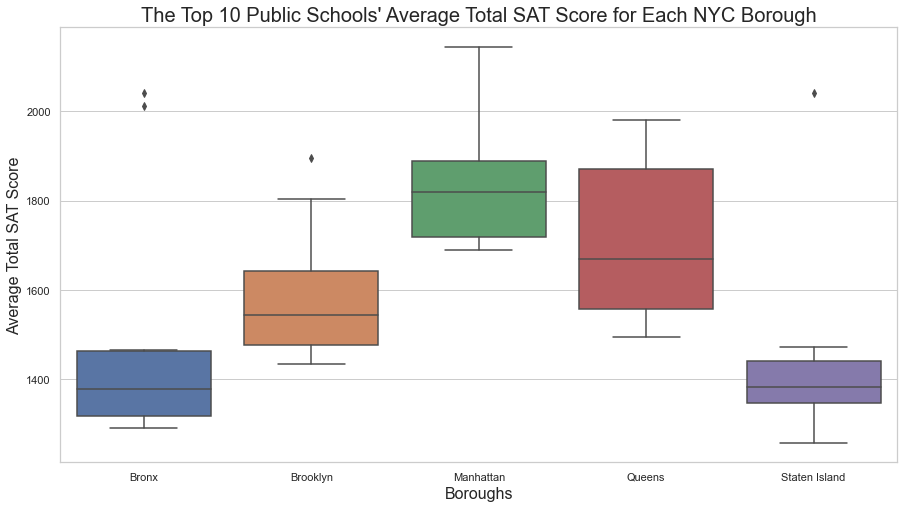

In [6]:
# select top 10 schools for each borough
dt_borough = df.groupby('Borough')['Average Total SAT'].nlargest(10).reset_index().drop('level_1',axis=1)

sns.set(style="whitegrid")

# make a boxplot
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot( x='Borough', y='Average Total SAT',data=dt_borough)
plt.title("The Top 10 Public Schools' Average Total SAT Score for Each NYC Borough", fontsize=20)
plt.xlabel('Boroughs', fontsize=16)
plt.ylabel('Average Total SAT Score', fontsize=16)
plt.show()

Plot 1 is a boxplot displaying the average total SAT scores for each borough's top 10 public schools. Schools in Manhattan have the highest mean with over 1800, while schools in the Bronx and Staten Island have the lowest with lower than 1400. Educational resources are unevenly distributed in different regions, and there are only one or two outstanding schools in the Bronx and Staten Island; the rest are mediocre.

### Plot 2: Share of Minorities

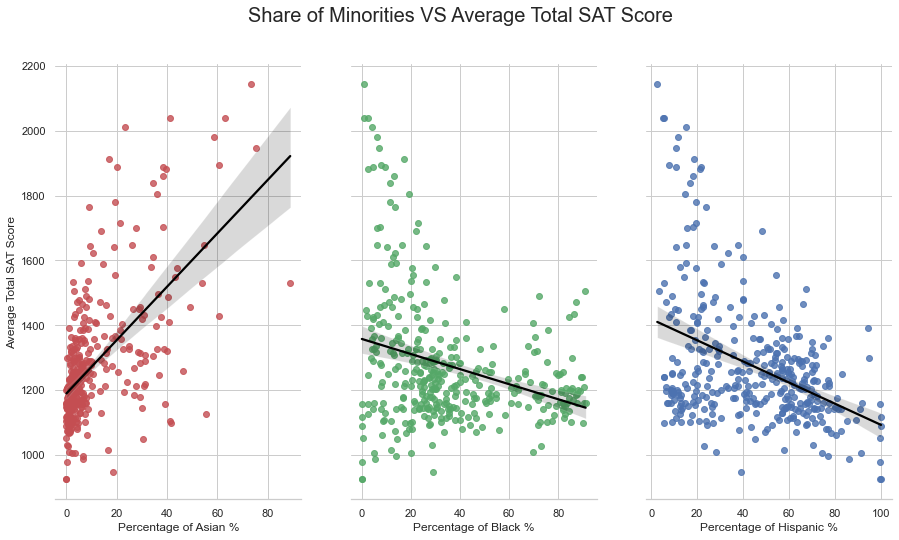

In [7]:
# Make scatterplots with regression lines
fig, ax = plt.subplots(1, 3, figsize=(15, 8), sharey=True)
sns.despine(left=True)

sns.regplot(x=df['Percent Asian'], y=df['Average Total SAT'], 
            color='r', ax=ax[0], line_kws={"color": "black"})

sns.regplot(x=df['Percent Black'], y=df['Average Total SAT'], 
            color='g', ax=ax[1], line_kws={"color": "black"})

sns.regplot(x=df['Percent Hispanic'], y=df['Average Total SAT'], 
            color='b', ax=ax[2], line_kws={"color": "black"})

ax[0].set_xlabel('Percentage of Asian %')
ax[1].set_xlabel('Percentage of Black %')
ax[2].set_xlabel('Percentage of Hispanic %')
ax[0].set_ylabel('Average Total SAT Score')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

fig.suptitle('Share of Minorities VS Average Total SAT Score',fontsize=20)
plt.subplots_adjust(hspace=0.4)
plt.show()

The scatter plots show the relationship between the percentages of minorities and the average SAT score for the school with average total SAT score in y-axis and percentage of minorities in x-axis(red for Asian, green for Black and blue for Hispanic).There is a positive relationship between the rate of Asian students and the average SAT score. However, the percentage of Black and Hispanic students are negatively related to the average SAT score.

### Plot 3: Percentage of Tested Student

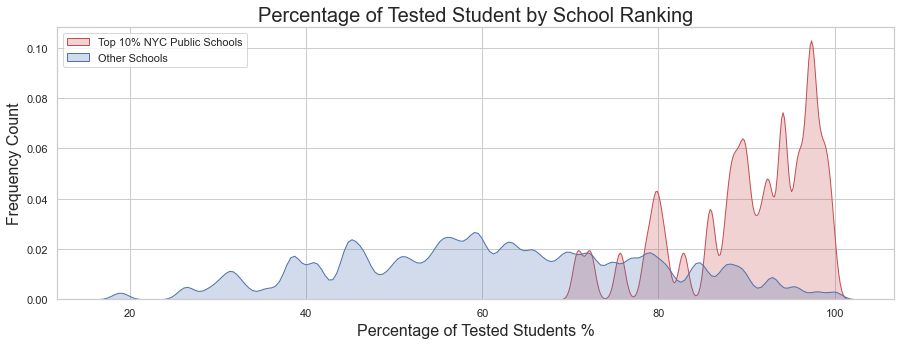

In [8]:
# Divide observation into two groups based on their SAT score
df['Quality']=['Good' if x > df['Average Total SAT'].quantile(0.90) else 'Other' for x in df['Average Total SAT']]

# Make a kernel density estimate plot
fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(df.loc[(df['Quality'] =='Good'),'Percent Tested'] ,
               color='r',shade=True, bw_adjust=0.15, ax=ax, label='Top 10% NYC Public Schools')
sns.kdeplot(df.loc[(df['Quality'] == 'Other'),'Percent Tested'] ,
               color='b',shade=True, bw_adjust=0.15, ax=ax, label='Other Schools')
plt.title("Percentage of Tested Student by School Ranking", fontsize=20)
plt.xlabel("Percentage of Tested Students %", fontsize=16)
plt.ylabel("Frequency Count", fontsize=16)
plt.legend(loc='upper left')
plt.show()

Plot 3 is a kernel density estimate plot for the percentage of tested students. The Red represents the top 10% of NYC public schools, and the blue for the rest schools. The plot shows that the percentage of tested students for the top 10% of schools is mainly concentrated between 90% and 100%, while percentage of the rest schools is normal distributed around 60%. Therefore, a good school usually has a high percentage of tested students.

## Conclusion

The study found that the overall level of public education in Manhattan is the highest and that the Bronx is the borough in the greatest need of improvement. There are 98 public high schools, but except for two high schools with average SAT scores above 2,000, the performance of the other schools is poor. Schools with a high percentage of Asian students have much higher average SAT scores than schools with a high percentage of black and Hispanic students. In addition, students at the top schools were more likely to take the SAT exam.

In conclusion, the government is suggested to increase public education spending in the Bronx borough. The government also needs to enhance the education level in black and Hispanic student-dominant schools. Besides, schools should incentivize students to take the SAT to improve the learning environment.


## Bibliography

1.Benveniste, L., Carnoy, M., &amp; Rothstein, R. (2003). All else equal: Are public and private schools different? RoutledgeFalmer.
    
2.Goyette, K. A., Farrie, D., &amp; Freely, J. (2012). This school's gone downhill:Racial Change and Perceived School Quality among Whites. Social Problems, 59(2), 155–176. https://doi.org/10.1525/sp.2012.59.2.155
    
3.U.S. News. (2023). Best high schools in New York - US news. Retrieved from https://www.usnews.com/education/best-high-schools/new-york 
    
4.Wagenknecht, Jared (2018). School Racial Composition and Its Effects on Parental Perceptions of School Quality. ISBN:978-0-438-26079-5
